**Exploratory Data Analysis**

In [10]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [11]:
dataset = pd.read_csv('PressureSensorData.csv')

In [12]:
rows=len(dataset)
cols=len(dataset.axes[1])
print('amount of rows=',rows,'amount of collums =',cols)
dataset.describe()

amount of rows= 108 amount of collums = 4


,test_id,pt_psia,pa_psia,pd_volts
count,107.000000,108.000000,108.000000,108.000000
mean,4.990654,83.750000,82.842593,1.575580
std,2.604406,58.442099,58.235930,0.958096
min,1.000000,5.000000,4.000000,0.283000
25%,3.000000,30.000000,29.250000,0.695842
50%,5.000000,85.000000,85.000000,1.595300
75%,7.000000,130.000000,129.000000,2.336950
max,9.000000,175.000000,174.000000,3.074700


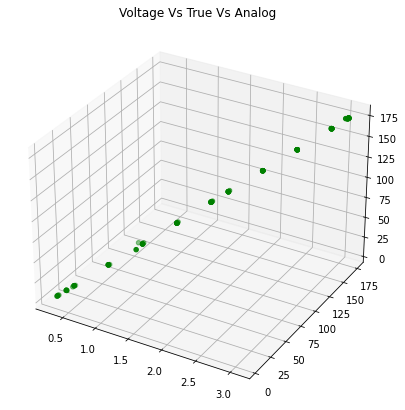

In [32]:
x = dataset['Voltage']
z = dataset['True_Pressure']
y = dataset['Analog_Pressure']
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, color = "green")
plt.title("Voltage Vs True Vs Analog")
plt.show()

In [14]:
dataset.columns = ['Test_ID', 'True_Pressure', 'Analog_Pressure', 'Voltage']

Text(0.5, 1.0, 'True Pressure against Analog Pressure')

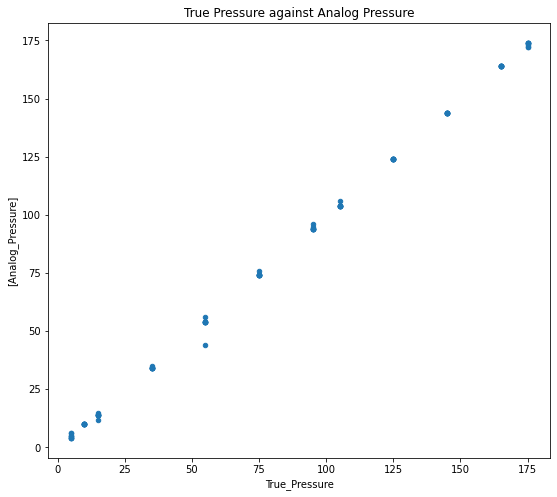

In [82]:
dataset.plot(x="True_Pressure", y=["Analog_Pressure"], kind="scatter", figsize=(9, 8))
plt.title('True Pressure against Analog Pressure')

Text(0.5, 1.0, 'Analog Pressure against Volts')

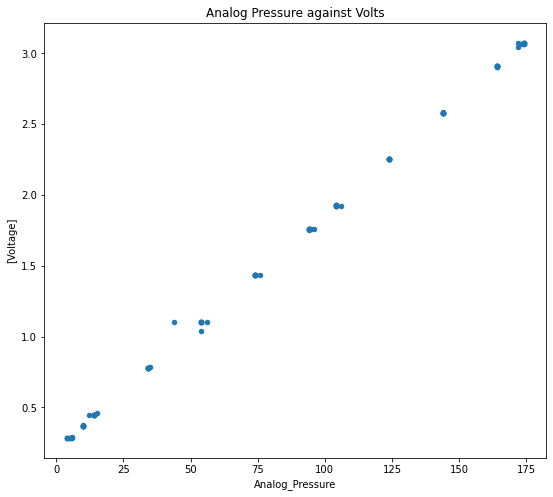

In [16]:
dataset.plot(x="Analog_Pressure", y=["Voltage"], kind="scatter", figsize=(9, 8))
plt.title('Analog Pressure against Volts')

Text(0.5, 1.0, 'True Pressure against Volts')

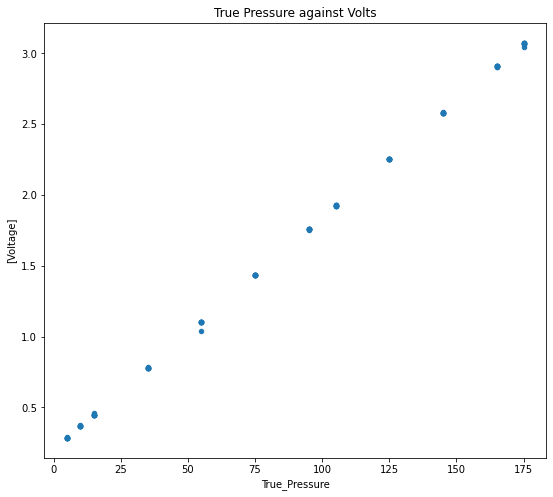

In [17]:
dataset.plot(x="True_Pressure", y=["Voltage"], kind="scatter", figsize=(9, 8))
plt.title('True Pressure against Volts')


Text(0.5, 1.0, 'Linear Regression Model for True Vs Analog')

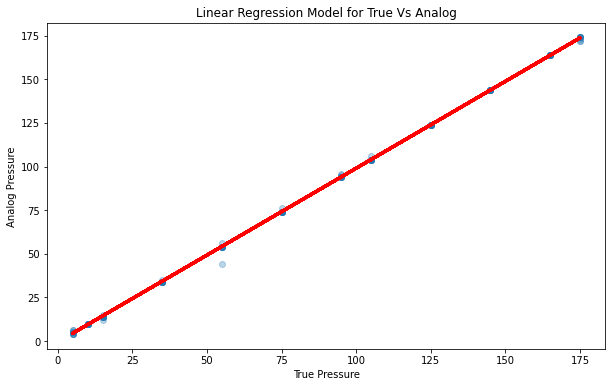

In [18]:
X = pd.DataFrame(dataset, columns=['True_Pressure'])
y = pd.DataFrame(dataset, columns=['Analog_Pressure'])
from sklearn.linear_model import LinearRegression
regression_TvsA = LinearRegression()
regression_TvsA.fit(X,y)
plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha=0.3)
plt.plot(X, regression_TvsA.predict(X), color='red', linewidth=3)
plt.xlabel('True Pressure')
plt.ylabel('Analog Pressure')
plt.title('Linear Regression Model for True Vs Analog')


In [19]:
#Least Squares
X = pd.DataFrame(dataset, columns=['True_Pressure'])
y = pd.DataFrame(dataset, columns=['Analog_Pressure'])
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:        Analog_Pressure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.634e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):          8.52e-182
Time:                        16:57:30   Log-Likelihood:                -169.52
No. Observations:                 108   AIC:                             343.0
Df Residuals:                     106   BIC:                             348.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5952      0.198     -3.007

C:\Users\taiyo\Downloads\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:        Analog_Pressure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.475e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):          2.30e-180
Time:                        16:57:32   Log-Likelihood:                -172.88
No. Observations:                 108   AIC:                             349.8
Df Residuals:                     106   BIC:                             355.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.9053      0.225    -57.364      0.0

C:\Users\taiyo\Downloads\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


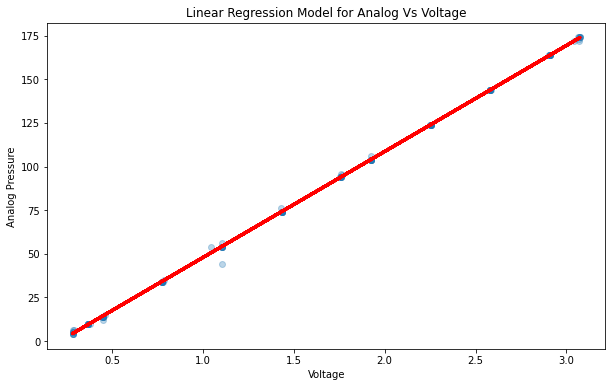

In [20]:
y = pd.DataFrame(dataset, columns=['Analog_Pressure'])
X = pd.DataFrame(dataset, columns=['Voltage'])
from sklearn.linear_model import LinearRegression
regression_AvsV = LinearRegression()
regression_AvsV.fit(X,y)
plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha=0.3)
plt.plot(X, regression_AvsV.predict(X), color='red', linewidth=3)
plt.xlabel('Voltage')
plt.ylabel('Analog Pressure')
plt.title('Linear Regression Model for Analog Vs Voltage')
#Least Squares
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:          True_Pressure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.896e+06
Date:                Tue, 03 May 2022   Prob (F-statistic):          3.15e-227
Time:                        16:57:34   Log-Likelihood:                -63.318
No. Observations:                 108   AIC:                             130.6
Df Residuals:                     106   BIC:                             136.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.3548      0.082   -151.451      0.0

C:\Users\taiyo\Downloads\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


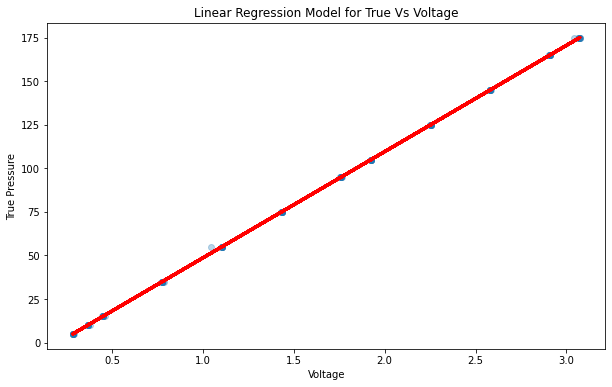

In [21]:
y= pd.DataFrame(dataset, columns=['True_Pressure'])
X = pd.DataFrame(dataset, columns=['Voltage'])
from sklearn.linear_model import LinearRegression
regression_TvsV = LinearRegression()
regression_TvsV.fit(X,y)
plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha=0.3)
plt.plot(X, regression_TvsV.predict(X), color='red', linewidth=3)
plt.xlabel('Voltage')
plt.ylabel('True Pressure')
plt.title('Linear Regression Model for True Vs Voltage')
#Least Squares
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

In [23]:
#True pressure prediction at 64 psi on Gauge
c=regression_TvsA.intercept_
mx=regression_TvsA.coef_ 
prediction=c+ mx*64
lm1 = smf.ols(formula='Analog_Pressure~ True_Pressure', data=dataset).fit()
lm1.conf_int()

,0,1
Intercept,-0.987638,-0.202701
True_Pressure,0.992423,1.000121


In [24]:
lm1.pvalues

Intercept         3.299402e-03
True_Pressure    8.522670e-182
dtype: float64

In [25]:
X = pd.DataFrame(dataset, columns=['True_Pressure'])
y = pd.DataFrame(dataset, columns=['Analog_Pressure'])
from sklearn.metrics import mean_absolute_error as mae
e=mae(X, y)
e/prediction

array([[0.01612442]])

In [26]:
print('A reading of 64 psi on the Gauge predicts a true pressure of',prediction,'+-',e/prediction,'psi with a confidence interval of 95%')

A reading of 64 psi on the Gauge predicts a true pressure of [[63.16622487]] +- [[0.01612442]] psi with a confidence interval of 95%


In [27]:
#True pressure prediction at measurement of 1.4320 Volts
c=regression_TvsV.intercept_
mx=regression_TvsV.coef_ 
prediction2=c+ mx*1.4320
lm2= smf.ols(formula='True_Pressure ~ Voltage', data=dataset).fit()
lm2.conf_int()

,0,1
Intercept,-12.516482,-12.193019
Voltage,60.908622,61.084254


In [28]:
lm2.pvalues

Intercept    1.036065e-125
Voltage      3.147008e-227
dtype: float64

In [29]:
y= pd.DataFrame(dataset, columns=['True_Pressure'])
X = pd.DataFrame(dataset, columns=['Analog_Pressure'])
e2=mae(X, y)
e2/prediction2

array([[0.01358167]])

In [30]:
print('A voltage of 1.4320 predicts a true pressure of',prediction2,'+-',e/prediction2,'psi with a confidence interval of 95%')

A voltage of 1.4320 predicts a true pressure of [[74.99214839]] +- [[0.01358167]] psi with a confidence interval of 95%


In [31]:
# 5 Sensor Voltages
c=regression_TvsV.intercept_
mx=regression_TvsV.coef_ 
pU1=c+ mx*3
pU2=c+ mx*.2
pU3=c+ mx*.03
pU4=c+ mx*5
pU5=c+ mx*.07
data = {'Test': ['U1', 'U2', 'U3', 'U4','U5'], 'Sensor Voltage': [3, 0.2, 0.03, 5,0.07], 'Predicted Pressure(psi)':[pU1,pU2,pU3,pU4,pU5], 'Uncertainty(+-)':[e2/pU1,e2/pU2,e2/pU3,e2/pU4,e2/pU5]}
df = pd.DataFrame(data) 
df

,Test,Sensor Voltage,Predicted Pressure(psi),Uncertainty(+-)
0,U1,3.00,[[170.63456299951594]],[[0.005969004758557667]]
1,U2,0.20,[[-0.15546308616858617]],[[-6.551513569041232]]
2,U3,0.03,[[-10.524857527085148]],[[-0.09677266565342255]]
3,U4,5.00,[[292.6274387750049]],[[0.0034805981379676296]]
4,U5,0.07,[[-8.085000011575367]],[[-0.1259763162721455]]
